In [1]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import pickle
import PIL.Image as Image
from torchvision.datasets.folder import ImageFolder
import torch.nn.functional as F
from pytorch_msssim import ssim
from skimage import measure
import time

In [2]:
class LeNet(nn.Module):
    def __init__(self, channel=3, hideen=768, num_classes=3):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        self.body = nn.Sequential(
            nn.Conv2d(channel, 12, kernel_size=5, padding=5 // 2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5 // 2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5 // 2, stride=1),
            act(),
        )
        self.fc = nn.Sequential(
            nn.Linear(hideen, num_classes)
        )

    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


def weights_init(m):
    try:
        if hasattr(m, "weight"):
            m.weight.data.uniform_(-0.5, 0.5)
    except Exception:
        print('warning: failed in weights_init for %s.weight' % m._get_name())
    try:
        if hasattr(m, "bias"):
            m.bias.data.uniform_(-0.5, 0.5)
    except Exception:
        print('warning: failed in weights_init for %s.bias' % m._get_name())


class Dataset_from_Image(Dataset):
    def __init__(self, imgs, labs, transform=None):
        self.imgs = imgs # img paths
        self.labs = labs # labs is ndarray
        self.transform = transform
        del imgs, labs

    def __len__(self):
        return self.labs.shape[0]

    def __getitem__(self, idx):
        lab = self.labs[idx]
        img = Image.open(self.imgs[idx])
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = self.transform(img)
        return img, lab

In [3]:

dataset = 'covid'
root_path = '.'
data_path = os.path.join(root_path, './data').replace('\\', '/')
save_path = os.path.join(root_path, 'results/iDLG_%s'%dataset).replace('\\', '/')



''' load data '''
if dataset == 'MNIST':
    shape_img = (28, 28)
    num_classes = 10
    channel = 1
    hidden = 588
    dst = datasets.MNIST(data_path, download=False)


elif dataset == 'covid':
    shape_img = (32, 32)
    num_classes = 3
    channel = 3
    hidden = 768
    dst = ImageFolder(r'C:\Users\badha\OneDrive - Florida International University\Desktop\PhD at FIU\Solid Lab\Spring 2023\CPL Attack Paper Exp\Covid_chest_X-raydata\Covid_chest_X-raydata\Covid19-dataset\train')



else:
    exit('unknown dataset')



lr = 1
num_dummy = 1
Iteration = 300
num_exp = 100

use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

tt = transforms.Compose([transforms.Resize(32),transforms.CenterCrop(32),transforms.ToTensor()])




tp = transforms.Compose([transforms.ToPILImage()])

print(dataset, 'root_path:', root_path)
print(dataset, 'data_path:', data_path)
print(dataset, 'save_path:', save_path)

if not os.path.exists('results'):
    os.mkdir('results')
if not os.path.exists(save_path):
    os.mkdir(save_path)







covid root_path: .
covid data_path: ././data
covid save_path: ./results/iDLG_covid


running 0|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 14:02:44] 0 loss = 375.61032104, mse = 2.44218612, mse_with_function = 2.44218612, ssim = -0.00077603


C:\Users\badha\AppData\Local\Temp\ipykernel_15896\2677447062.py:105: UserWarning: Using a target size (torch.Size([1, 1, 3, 32, 32])) that is different to the input size (torch.Size([1, 3, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse_f.append(F.mse_loss(dummy_data,torch.unsqueeze(gt_data,dim=0),  reduction='mean').item())


[2024-03-21 14:02:45] 10 loss = 375.64611816, mse = 22.55385971, mse_with_function = 22.55385971, ssim = 0.00001712
[2024-03-21 14:02:45] 20 loss = 375.64587402, mse = 22.56496811, mse_with_function = 22.56496811, ssim = 0.00001710
[2024-03-21 14:02:45] 30 loss = 375.64556885, mse = 22.57680321, mse_with_function = 22.57680321, ssim = 0.00001708
[2024-03-21 14:02:46] 40 loss = 375.64529419, mse = 22.58713341, mse_with_function = 22.58713341, ssim = 0.00001705
[2024-03-21 14:02:46] 50 loss = 427.27304077, mse = 41004785664.00000000, mse_with_function = 41004785664.00000000, ssim = 0.00000000
[2024-03-21 14:02:46] 60 loss = 427.27304077, mse = 41004785664.00000000, mse_with_function = 41004785664.00000000, ssim = 0.00000000
[2024-03-21 14:02:46] 70 loss = 427.27304077, mse = 41004785664.00000000, mse_with_function = 41004785664.00000000, ssim = 0.00000000
[2024-03-21 14:02:47] 80 loss = 427.27304077, mse = 41004785664.00000000, mse_with_function = 41004785664.00000000, ssim = 0.00000000


[2024-03-21 14:08:37] 40 loss = 0.00209656, mse = 0.01359288, mse_with_function = 0.01359288, ssim = 0.80499566
[2024-03-21 14:08:47] 50 loss = 0.00066866, mse = 0.00570711, mse_with_function = 0.00570711, ssim = 0.91686571
[2024-03-21 14:08:58] 60 loss = 0.00023557, mse = 0.00238184, mse_with_function = 0.00238184, ssim = 0.96922064
[2024-03-21 14:09:08] 70 loss = 0.00008986, mse = 0.00092638, mse_with_function = 0.00092638, ssim = 0.98865271
[2024-03-21 14:09:18] 80 loss = 0.00003393, mse = 0.00038664, mse_with_function = 0.00038664, ssim = 0.99463433
[2024-03-21 14:09:29] 90 loss = 0.00001321, mse = 0.00016059, mse_with_function = 0.00016059, ssim = 0.99759674
[2024-03-21 14:09:39] 100 loss = 0.00000517, mse = 0.00006870, mse_with_function = 0.00006870, ssim = 0.99902272
[2024-03-21 14:09:49] 110 loss = 0.00000226, mse = 0.00003440, mse_with_function = 0.00003440, ssim = 0.99955362
[2024-03-21 14:10:00] 120 loss = 0.00000115, mse = 0.00001885, mse_with_function = 0.00001885, ssim = 

[2024-03-21 14:14:51] 250 loss = 0.25307611, mse = 12.60921478, mse_with_function = 12.60921478, ssim = 0.00170344
[2024-03-21 14:15:01] 260 loss = 0.24496238, mse = 12.90699005, mse_with_function = 12.90699005, ssim = 0.00173818
[2024-03-21 14:15:12] 270 loss = 0.23829381, mse = 13.14611626, mse_with_function = 13.14611626, ssim = 0.00174472
[2024-03-21 14:15:22] 280 loss = 0.23198901, mse = 13.42530632, mse_with_function = 13.42530632, ssim = 0.00176369
[2024-03-21 14:15:33] 290 loss = 0.22624481, mse = 13.72148132, mse_with_function = 13.72148132, ssim = 0.00179050
imidx_list: [98]
loss_iDLG: 0.22143471240997314
mse_iDLG: 13.977999687194824
mse_iDLG_with_functuon: 13.977999687194824
SSIM_iDLG: 0.0018189914990216494
Duration: 302.203125
gt_label: [0] lab_iDLG: 0
----------------------


running 5|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 14:15:43] 0 loss = 93.79808044, mse = 1.36710429, mse_with_function = 1.36710429, ssim = 0.00086644
[2024-03-21 14:15:52] 10 

[2024-03-21 14:21:54] 10 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:54] 20 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:54] 30 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:54] 40 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:55] 50 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:55] 60 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:55] 70 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:55] 80 loss = 821.01965332, mse = 2.35992241, mse_with_function = 2.35992241, ssim = -0.00030954
[2024-03-21 14:21:55] 90 loss = 821.01965332, mse = 2.35992241, mse_with_functio

[2024-03-21 14:25:32] 80 loss = 457.65982056, mse = 100890928.00000000, mse_with_function = 100890928.00000000, ssim = 0.00000000
[2024-03-21 14:25:33] 90 loss = 457.65982056, mse = 100890928.00000000, mse_with_function = 100890928.00000000, ssim = 0.00000000
[2024-03-21 14:25:33] 100 loss = 457.65982056, mse = 100890936.00000000, mse_with_function = 100890936.00000000, ssim = 0.00000000
[2024-03-21 14:25:34] 110 loss = 457.65982056, mse = 100890936.00000000, mse_with_function = 100890936.00000000, ssim = 0.00000000
[2024-03-21 14:25:34] 120 loss = 457.65982056, mse = 100890944.00000000, mse_with_function = 100890944.00000000, ssim = 0.00000000
[2024-03-21 14:25:35] 130 loss = 457.65982056, mse = 100890944.00000000, mse_with_function = 100890944.00000000, ssim = 0.00000000
[2024-03-21 14:25:36] 140 loss = 457.65982056, mse = 100890944.00000000, mse_with_function = 100890944.00000000, ssim = 0.00000000
[2024-03-21 14:25:36] 150 loss = 457.65982056, mse = 100890944.00000000, mse_with_fun

[2024-03-21 14:27:40] 130 loss = 0.00004980, mse = 0.00121794, mse_with_function = 0.00121794, ssim = 0.87365389
[2024-03-21 14:27:48] 140 loss = 0.00003241, mse = 0.00077475, mse_with_function = 0.00077475, ssim = 0.90139914
[2024-03-21 14:27:56] 150 loss = 0.00002124, mse = 0.00049533, mse_with_function = 0.00049533, ssim = 0.92700374
[2024-03-21 14:28:04] 160 loss = 0.00001406, mse = 0.00030566, mse_with_function = 0.00030566, ssim = 0.94863248
[2024-03-21 14:28:12] 170 loss = 0.00000885, mse = 0.00018202, mse_with_function = 0.00018202, ssim = 0.96695817
[2024-03-21 14:28:21] 180 loss = 0.00000569, mse = 0.00011638, mse_with_function = 0.00011638, ssim = 0.97857285
[2024-03-21 14:28:29] 190 loss = 0.00000376, mse = 0.00007436, mse_with_function = 0.00007436, ssim = 0.98630226
[2024-03-21 14:28:36] 200 loss = 0.00000254, mse = 0.00005037, mse_with_function = 0.00005037, ssim = 0.99096107
[2024-03-21 14:28:42] 210 loss = 0.00000197, mse = 0.00003786, mse_with_function = 0.00003786, s

[2024-03-21 14:33:10] 150 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:10] 160 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:11] 170 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:11] 180 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:11] 190 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:11] 200 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:12] 210 loss = 261.08871460, mse = 1818335232.00000000, mse_with_function = 1818335232.00000000, ssim = 0.00000000
[2024-03-21 14:33:12] 220 loss = 261.08871460, mse = 1818335232.00000

imidx_list: [155]
loss_iDLG: 2.5399438072781777e-06
mse_iDLG: 6.663379463134333e-05
mse_iDLG_with_functuon: 6.663379463134333e-05
SSIM_iDLG: 0.9996613264083862
Duration: 214.375
gt_label: [1] lab_iDLG: 1
----------------------


running 17|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 14:39:20] 0 loss = 18.67697334, mse = 1.55185926, mse_with_function = 1.55185926, ssim = 0.00390165
[2024-03-21 14:39:29] 10 loss = 0.54441667, mse = 0.59247386, mse_with_function = 0.59247386, ssim = 0.05694925
[2024-03-21 14:39:40] 20 loss = 0.07437634, mse = 0.26061991, mse_with_function = 0.26061991, ssim = 0.14253081
[2024-03-21 14:39:51] 30 loss = 0.01978200, mse = 0.13418406, mse_with_function = 0.13418406, ssim = 0.26096609
[2024-03-21 14:40:01] 40 loss = 0.00660276, mse = 0.07364026, mse_with_function = 0.07364026, ssim = 0.38329491
[2024-03-21 14:40:12] 50 loss = 0.00236259, mse = 0.04162703, mse_with_function = 0.04162703, ssim = 0.51732391
[2024-03-21 14:40:23] 60 loss = 0.0

[2024-03-21 14:44:08] 50 loss = 0.00942176, mse = 0.06111561, mse_with_function = 0.06111561, ssim = 0.42266357
[2024-03-21 14:44:19] 60 loss = 0.00404251, mse = 0.03868601, mse_with_function = 0.03868601, ssim = 0.52172410
[2024-03-21 14:44:29] 70 loss = 0.00213248, mse = 0.02625534, mse_with_function = 0.02625534, ssim = 0.60176599
[2024-03-21 14:44:40] 80 loss = 0.00120466, mse = 0.01803358, mse_with_function = 0.01803358, ssim = 0.66867036
[2024-03-21 14:44:50] 90 loss = 0.00069210, mse = 0.01186592, mse_with_function = 0.01186592, ssim = 0.72756910
[2024-03-21 14:45:01] 100 loss = 0.00041543, mse = 0.00778996, mse_with_function = 0.00778996, ssim = 0.77680910
[2024-03-21 14:45:11] 110 loss = 0.00025375, mse = 0.00509588, mse_with_function = 0.00509588, ssim = 0.81855142
[2024-03-21 14:45:21] 120 loss = 0.00016248, mse = 0.00348166, mse_with_function = 0.00348166, ssim = 0.85284960
[2024-03-21 14:45:32] 130 loss = 0.00010740, mse = 0.00238470, mse_with_function = 0.00238470, ssim =

[2024-03-21 14:49:59] 130 loss = 0.00000109, mse = 0.00001821, mse_with_function = 0.00001821, ssim = 0.99933451
[2024-03-21 14:50:10] 140 loss = 0.00000066, mse = 0.00001197, mse_with_function = 0.00001197, ssim = 0.99960583
imidx_list: [13]
loss_iDLG: 6.577430440302123e-07
mse_iDLG: 1.1970557352469768e-05
mse_iDLG_with_functuon: 1.1970557352469768e-05
SSIM_iDLG: 0.9996058344841003
Duration: 147.3125
gt_label: [0] lab_iDLG: 0
----------------------


running 22|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 14:50:10] 0 loss = 68.70835876, mse = 1.29100490, mse_with_function = 1.29100490, ssim = 0.00922871
[2024-03-21 14:50:20] 10 loss = 0.98597646, mse = 0.38342425, mse_with_function = 0.38342425, ssim = 0.12126427
[2024-03-21 14:50:30] 20 loss = 0.08508622, mse = 0.11638185, mse_with_function = 0.11638185, ssim = 0.33756727
[2024-03-21 14:50:41] 30 loss = 0.01522916, mse = 0.04503781, mse_with_function = 0.04503781, ssim = 0.56673932
[2024-03-21 14:50:52] 40 loss = 

imidx_list: [239]
loss_iDLG: 9.186818488160498e-07
mse_iDLG: 1.4868168830871582
mse_iDLG_with_functuon: 1.4868168830871582
SSIM_iDLG: -0.00015182196511887014
Duration: 0.078125
gt_label: [2] lab_iDLG: 2
----------------------


running 26|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 14:58:35] 0 loss = 34.17628860, mse = 1.22455633, mse_with_function = 1.22455633, ssim = 0.00351288
[2024-03-21 14:58:44] 10 loss = 0.61253422, mse = 0.36513925, mse_with_function = 0.36513925, ssim = 0.04085202
[2024-03-21 14:58:55] 20 loss = 0.06614231, mse = 0.10202368, mse_with_function = 0.10202368, ssim = 0.11628898
[2024-03-21 14:59:05] 30 loss = 0.01035523, mse = 0.03223261, mse_with_function = 0.03223261, ssim = 0.29160613
[2024-03-21 14:59:16] 40 loss = 0.00247745, mse = 0.01158779, mse_with_function = 0.01158779, ssim = 0.47717330
[2024-03-21 14:59:26] 50 loss = 0.00073098, mse = 0.00398444, mse_with_function = 0.00398444, ssim = 0.64724731
[2024-03-21 14:59:36] 60 loss = 0.00

[2024-03-21 15:08:59] 160 loss = 4.00599766, mse = 23.39037704, mse_with_function = 23.39037704, ssim = 0.00308441
[2024-03-21 15:09:10] 170 loss = 3.90033197, mse = 24.17507744, mse_with_function = 24.17507744, ssim = 0.00306608
[2024-03-21 15:09:20] 180 loss = 3.81301832, mse = 24.90036392, mse_with_function = 24.90036392, ssim = 0.00309207
[2024-03-21 15:09:31] 190 loss = 3.73113108, mse = 25.48454285, mse_with_function = 25.48454285, ssim = 0.00308093
[2024-03-21 15:09:42] 200 loss = 3.67877340, mse = 26.19839859, mse_with_function = 26.19839859, ssim = 0.00300938
[2024-03-21 15:09:52] 210 loss = 3.62276411, mse = 27.02679062, mse_with_function = 27.02679062, ssim = 0.00288359
[2024-03-21 15:10:03] 220 loss = 3.57489610, mse = 27.93934250, mse_with_function = 27.93934250, ssim = 0.00277350
[2024-03-21 15:10:14] 230 loss = 3.52617502, mse = 28.73537827, mse_with_function = 28.73537827, ssim = 0.00267583
[2024-03-21 15:10:25] 240 loss = 3.48643994, mse = 29.59613037, mse_with_functio

[2024-03-21 15:15:08] 200 loss = 0.00002050, mse = 0.00265614, mse_with_function = 0.00265614, ssim = 0.98352849
[2024-03-21 15:15:18] 210 loss = 0.00001740, mse = 0.00235689, mse_with_function = 0.00235689, ssim = 0.98551321
[2024-03-21 15:15:29] 220 loss = 0.00001436, mse = 0.00201853, mse_with_function = 0.00201853, ssim = 0.98756790
[2024-03-21 15:15:38] 230 loss = 0.00001235, mse = 0.00180459, mse_with_function = 0.00180459, ssim = 0.98914480
[2024-03-21 15:15:49] 240 loss = 0.00001058, mse = 0.00156452, mse_with_function = 0.00156452, ssim = 0.99058902
[2024-03-21 15:15:59] 250 loss = 0.00000910, mse = 0.00137464, mse_with_function = 0.00137464, ssim = 0.99198651
[2024-03-21 15:16:09] 260 loss = 0.00000774, mse = 0.00124085, mse_with_function = 0.00124085, ssim = 0.99327487
[2024-03-21 15:16:19] 270 loss = 0.00000648, mse = 0.00105050, mse_with_function = 0.00105050, ssim = 0.99454200
[2024-03-21 15:16:28] 280 loss = 0.00000548, mse = 0.00091455, mse_with_function = 0.00091455, s

[2024-03-21 15:21:42] 280 loss = 0.00000377, mse = 0.00045948, mse_with_function = 0.00045948, ssim = 0.90688992
[2024-03-21 15:21:43] 290 loss = 0.00000377, mse = 0.00045948, mse_with_function = 0.00045948, ssim = 0.90688992
imidx_list: [92]
loss_iDLG: 3.7681509184039896e-06
mse_iDLG: 0.00045947631588205695
mse_iDLG_with_functuon: 0.00045947631588205695
SSIM_iDLG: 0.9068899154663086
Duration: 284.515625
gt_label: [0] lab_iDLG: 0
----------------------


running 35|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 15:21:44] 0 loss = 17.10155296, mse = 1.34296834, mse_with_function = 1.34296834, ssim = 0.00289549
[2024-03-21 15:21:54] 10 loss = 0.29325649, mse = 0.47130069, mse_with_function = 0.47130069, ssim = 0.08670400
[2024-03-21 15:22:04] 20 loss = 0.05140779, mse = 0.23572731, mse_with_function = 0.23572731, ssim = 0.19771662
[2024-03-21 15:22:15] 30 loss = 0.01372295, mse = 0.12843023, mse_with_function = 0.12843023, ssim = 0.34255415
[2024-03-21 15:22:25] 40 loss

[2024-03-21 15:31:20] 250 loss = 0.00000116, mse = 0.00005473, mse_with_function = 0.00005473, ssim = 0.99926323
[2024-03-21 15:31:21] 260 loss = 0.00000116, mse = 0.00005473, mse_with_function = 0.00005473, ssim = 0.99926323
[2024-03-21 15:31:22] 270 loss = 0.00000116, mse = 0.00005473, mse_with_function = 0.00005473, ssim = 0.99926323
[2024-03-21 15:31:23] 280 loss = 0.00000116, mse = 0.00005473, mse_with_function = 0.00005473, ssim = 0.99926323
[2024-03-21 15:31:24] 290 loss = 0.00000116, mse = 0.00005473, mse_with_function = 0.00005473, ssim = 0.99926323
imidx_list: [249]
loss_iDLG: 1.1557530115169357e-06
mse_iDLG: 5.4729483963456005e-05
mse_iDLG_with_functuon: 5.4729483963456005e-05
SSIM_iDLG: 0.9992632269859314
Duration: 240.625
gt_label: [2] lab_iDLG: 2
----------------------


running 39|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 15:31:25] 0 loss = 154.36340332, mse = 19.00134277, mse_with_function = 19.00134277, ssim = 0.00057881
[2024-03-21 15:31:34] 10 

[2024-03-21 15:41:44] 130 loss = 0.00000495, mse = 0.00010864, mse_with_function = 0.00010864, ssim = 0.98635024
[2024-03-21 15:41:54] 140 loss = 0.00000264, mse = 0.00006073, mse_with_function = 0.00006073, ssim = 0.99260467
[2024-03-21 15:42:05] 150 loss = 0.00000153, mse = 0.00003720, mse_with_function = 0.00003720, ssim = 0.99526948
[2024-03-21 15:42:15] 160 loss = 0.00000099, mse = 0.00002276, mse_with_function = 0.00002276, ssim = 0.99679393
imidx_list: [107]
loss_iDLG: 9.897256632029894e-07
mse_iDLG: 2.2757321858080104e-05
mse_iDLG_with_functuon: 2.2757321858080104e-05
SSIM_iDLG: 0.9967939257621765
Duration: 168.015625
gt_label: [0] lab_iDLG: 0
----------------------


running 42|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 15:42:15] 0 loss = 27.51275063, mse = 1.34819877, mse_with_function = 1.34819877, ssim = 0.00014222
[2024-03-21 15:42:24] 10 loss = 1.22146130, mse = 0.74556583, mse_with_function = 0.74556583, ssim = 0.03049524
[2024-03-21 15:42:35] 20 lo

[2024-03-21 15:52:13] 70 loss = 0.00017432, mse = 0.00171145, mse_with_function = 0.00171145, ssim = 0.97860688
[2024-03-21 15:52:23] 80 loss = 0.00008253, mse = 0.00088883, mse_with_function = 0.00088883, ssim = 0.99001139
[2024-03-21 15:52:34] 90 loss = 0.00003550, mse = 0.00042695, mse_with_function = 0.00042695, ssim = 0.99596494
[2024-03-21 15:52:44] 100 loss = 0.00001598, mse = 0.00023812, mse_with_function = 0.00023812, ssim = 0.99795908
[2024-03-21 15:52:55] 110 loss = 0.00000867, mse = 0.00015131, mse_with_function = 0.00015131, ssim = 0.99877137
[2024-03-21 15:53:06] 120 loss = 0.00000534, mse = 0.00009630, mse_with_function = 0.00009630, ssim = 0.99923277
[2024-03-21 15:53:15] 130 loss = 0.00000336, mse = 0.00006027, mse_with_function = 0.00006027, ssim = 0.99952066
[2024-03-21 15:53:24] 140 loss = 0.00000227, mse = 0.00003928, mse_with_function = 0.00003928, ssim = 0.99969071
[2024-03-21 15:53:35] 150 loss = 0.00000140, mse = 0.00002269, mse_with_function = 0.00002269, ssim

[2024-03-21 15:58:02] 250 loss = 393.94482422, mse = 15940768.00000000, mse_with_function = 15940768.00000000, ssim = 0.00000001
[2024-03-21 15:58:03] 260 loss = 393.94482422, mse = 15940800.00000000, mse_with_function = 15940800.00000000, ssim = 0.00000001
[2024-03-21 15:58:03] 270 loss = 393.94482422, mse = 15940851.00000000, mse_with_function = 15940851.00000000, ssim = 0.00000001
[2024-03-21 15:58:05] 280 loss = 189.86262512, mse = 49583042560.00000000, mse_with_function = 49583042560.00000000, ssim = 0.00000000
[2024-03-21 15:58:05] 290 loss = 189.86262512, mse = 49583042560.00000000, mse_with_function = 49583042560.00000000, ssim = 0.00000000
imidx_list: [218]
loss_iDLG: 189.8626251220703
mse_iDLG: 49583042560.0
mse_iDLG_with_functuon: 49583042560.0
SSIM_iDLG: 7.458367257129339e-12
Duration: 29.640625
gt_label: [2] lab_iDLG: 2
----------------------


running 47|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 15:58:06] 0 loss = 0.00002159, mse = 1.30452192, mse_w

[2024-03-21 16:03:10] 160 loss = 0.00000193, mse = 0.00011475, mse_with_function = 0.00011475, ssim = 0.99833649
[2024-03-21 16:03:19] 170 loss = 0.00000144, mse = 0.00009018, mse_with_function = 0.00009018, ssim = 0.99871004
[2024-03-21 16:03:24] 180 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, ssim = 0.99884272
[2024-03-21 16:03:25] 190 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, ssim = 0.99884272
[2024-03-21 16:03:26] 200 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, ssim = 0.99884272
[2024-03-21 16:03:26] 210 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, ssim = 0.99884272
[2024-03-21 16:03:27] 220 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, ssim = 0.99884272
[2024-03-21 16:03:28] 230 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, ssim = 0.99884272
[2024-03-21 16:03:29] 240 loss = 0.00000127, mse = 0.00008125, mse_with_function = 0.00008125, s

[2024-03-21 16:07:08] 0 loss = 20.88454819, mse = 1.17483401, mse_with_function = 1.17483401, ssim = 0.00215345
[2024-03-21 16:07:16] 10 loss = 0.30817863, mse = 0.31650898, mse_with_function = 0.31650898, ssim = 0.02502744
[2024-03-21 16:07:26] 20 loss = 0.03436312, mse = 0.12223889, mse_with_function = 0.12223889, ssim = 0.07861947
[2024-03-21 16:07:37] 30 loss = 0.00760535, mse = 0.04981118, mse_with_function = 0.04981118, ssim = 0.17916207
[2024-03-21 16:07:48] 40 loss = 0.00223519, mse = 0.02357163, mse_with_function = 0.02357163, ssim = 0.30977854
[2024-03-21 16:07:58] 50 loss = 0.00081679, mse = 0.01184031, mse_with_function = 0.01184031, ssim = 0.45305061
[2024-03-21 16:08:09] 60 loss = 0.00033991, mse = 0.00618194, mse_with_function = 0.00618194, ssim = 0.58682621
[2024-03-21 16:08:19] 70 loss = 0.00014733, mse = 0.00305919, mse_with_function = 0.00305919, ssim = 0.71448791
[2024-03-21 16:08:30] 80 loss = 0.00006784, mse = 0.00152787, mse_with_function = 0.00152787, ssim = 0.8

[2024-03-21 16:12:36] 120 loss = 0.00000093, mse = 0.00000948, mse_with_function = 0.00000948, ssim = 0.99920642
imidx_list: [107]
loss_iDLG: 9.281852726417128e-07
mse_iDLG: 9.481590495852288e-06
mse_iDLG_with_functuon: 9.481590495852288e-06
SSIM_iDLG: 0.9992064237594604
Duration: 132.40625
gt_label: [0] lab_iDLG: 0
----------------------


running 56|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:12:36] 0 loss = 0.00000000, mse = 1.37594628, mse_with_function = 1.37594628, ssim = -0.00266863
imidx_list: [225]
loss_iDLG: 2.7189095419544174e-09
mse_iDLG: 1.375946283340454
mse_iDLG_with_functuon: 1.375946283340454
SSIM_iDLG: -0.002668634755536914
Duration: 0.09375
gt_label: [2] lab_iDLG: 2
----------------------


running 57|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:12:37] 0 loss = 0.06744055, mse = 1.26089513, mse_with_function = 1.26089513, ssim = 0.00068523
[2024-03-21 16:12:46] 10 loss = 0.00606735, mse = 0.95073193, mse_with_function = 

[2024-03-21 16:15:54] 50 loss = 516.89178467, mse = 58662220.00000000, mse_with_function = 58662220.00000000, ssim = -0.00000000
[2024-03-21 16:15:55] 60 loss = 516.89178467, mse = 58662220.00000000, mse_with_function = 58662220.00000000, ssim = -0.00000000
[2024-03-21 16:15:55] 70 loss = 516.89172363, mse = 58662224.00000000, mse_with_function = 58662224.00000000, ssim = -0.00000000
[2024-03-21 16:15:56] 80 loss = 516.89172363, mse = 58662224.00000000, mse_with_function = 58662224.00000000, ssim = -0.00000000
[2024-03-21 16:15:57] 90 loss = 516.89172363, mse = 58662232.00000000, mse_with_function = 58662232.00000000, ssim = -0.00000000
[2024-03-21 16:15:57] 100 loss = 516.89172363, mse = 58662232.00000000, mse_with_function = 58662232.00000000, ssim = -0.00000000
[2024-03-21 16:15:58] 110 loss = 516.89172363, mse = 58662232.00000000, mse_with_function = 58662232.00000000, ssim = -0.00000000
[2024-03-21 16:15:58] 120 loss = 516.89172363, mse = 58662232.00000000, mse_with_function = 586

[2024-03-21 16:17:17] 30 loss = 0.01480074, mse = 0.05428028, mse_with_function = 0.05428028, ssim = 0.37688792
[2024-03-21 16:17:28] 40 loss = 0.00375912, mse = 0.02418797, mse_with_function = 0.02418797, ssim = 0.55937743
[2024-03-21 16:17:39] 50 loss = 0.00124143, mse = 0.01090038, mse_with_function = 0.01090038, ssim = 0.71381414
[2024-03-21 16:17:50] 60 loss = 0.00046417, mse = 0.00502970, mse_with_function = 0.00502970, ssim = 0.82929826
[2024-03-21 16:18:01] 70 loss = 0.00018761, mse = 0.00221712, mse_with_function = 0.00221712, ssim = 0.90946662
[2024-03-21 16:18:11] 80 loss = 0.00007881, mse = 0.00096524, mse_with_function = 0.00096524, ssim = 0.95616567
[2024-03-21 16:18:22] 90 loss = 0.00003266, mse = 0.00040873, mse_with_function = 0.00040873, ssim = 0.98026532
[2024-03-21 16:18:33] 100 loss = 0.00001435, mse = 0.00017121, mse_with_function = 0.00017121, ssim = 0.99129713
[2024-03-21 16:18:43] 110 loss = 0.00000556, mse = 0.00006588, mse_with_function = 0.00006588, ssim = 0

[2024-03-21 16:23:53] 120 loss = 0.00000304, mse = 0.00004665, mse_with_function = 0.00004665, ssim = 0.99776781
[2024-03-21 16:24:03] 130 loss = 0.00000160, mse = 0.00002530, mse_with_function = 0.00002530, ssim = 0.99879742
[2024-03-21 16:24:14] 140 loss = 0.00000085, mse = 0.00001335, mse_with_function = 0.00001335, ssim = 0.99937248
imidx_list: [26]
loss_iDLG: 8.4614259776572e-07
mse_iDLG: 1.3352461792237591e-05
mse_iDLG_with_functuon: 1.3352461792237591e-05
SSIM_iDLG: 0.9993724822998047
Duration: 140.875
gt_label: [0] lab_iDLG: 0
----------------------


running 65|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:24:14] 0 loss = 0.06955773, mse = 1.39095962, mse_with_function = 1.39095962, ssim = -0.00317078
[2024-03-21 16:24:23] 10 loss = 0.00434218, mse = 1.04311061, mse_with_function = 1.04311061, ssim = 0.02526671
[2024-03-21 16:24:34] 20 loss = 0.00171945, mse = 0.77371264, mse_with_function = 0.77371264, ssim = 0.04370266
[2024-03-21 16:24:44] 30 loss = 0.

[2024-03-21 16:27:06] 270 loss = 382.50192261, mse = 28882504014364672.00000000, mse_with_function = 28882504014364672.00000000, ssim = -0.00000000
[2024-03-21 16:27:07] 280 loss = 382.50192261, mse = 28882504014364672.00000000, mse_with_function = 28882504014364672.00000000, ssim = -0.00000000
[2024-03-21 16:27:07] 290 loss = 382.50192261, mse = 28882504014364672.00000000, mse_with_function = 28882504014364672.00000000, ssim = -0.00000000
imidx_list: [14]
loss_iDLG: 382.5019226074219
mse_iDLG: 2.888250401436467e+16
mse_iDLG_with_functuon: 2.888250401436467e+16
SSIM_iDLG: -1.0968636606857311e-17
Duration: 13.28125
gt_label: [0] lab_iDLG: 0
----------------------


running 67|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:27:07] 0 loss = 0.00000050, mse = 1.41081846, mse_with_function = 1.41081846, ssim = -0.00027594
imidx_list: [117]
loss_iDLG: 5.034800665271177e-07
mse_iDLG: 1.4108184576034546
mse_iDLG_with_functuon: 1.4108184576034546
SSIM_iDLG: -0.00027594418497

[2024-03-21 16:35:31] 250 loss = 4.41400051, mse = 21.65469742, mse_with_function = 21.65469742, ssim = 0.00319312
[2024-03-21 16:35:42] 260 loss = 4.19232941, mse = 22.31658936, mse_with_function = 22.31658936, ssim = 0.00330776
[2024-03-21 16:35:52] 270 loss = 4.04455996, mse = 22.78947258, mse_with_function = 22.78947258, ssim = 0.00322144
[2024-03-21 16:36:03] 280 loss = 3.92432952, mse = 23.41052818, mse_with_function = 23.41052818, ssim = 0.00315649
[2024-03-21 16:36:13] 290 loss = 3.84143257, mse = 23.93234062, mse_with_function = 23.93234062, ssim = 0.00303437
imidx_list: [61]
loss_iDLG: 3.773394823074341
mse_iDLG: 24.448543548583984
mse_iDLG_with_functuon: 24.448543548583984
SSIM_iDLG: 0.0028840438462793827
Duration: 239.46875
gt_label: [0] lab_iDLG: 0
----------------------


running 71|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:36:23] 0 loss = 62.10877991, mse = 1.26266515, mse_with_function = 1.26266515, ssim = 0.01008849
[2024-03-21 16:36:32] 10 lo

[2024-03-21 16:41:39] 90 loss = 0.00001041, mse = 0.00022089, mse_with_function = 0.00022089, ssim = 0.99763155
[2024-03-21 16:41:50] 100 loss = 0.00000472, mse = 0.00011859, mse_with_function = 0.00011859, ssim = 0.99901402
[2024-03-21 16:42:00] 110 loss = 0.00000218, mse = 0.00006493, mse_with_function = 0.00006493, ssim = 0.99953240
[2024-03-21 16:42:11] 120 loss = 0.00000123, mse = 0.00004235, mse_with_function = 0.00004235, ssim = 0.99972725
[2024-03-21 16:42:20] 130 loss = 0.00000081, mse = 0.00002904, mse_with_function = 0.00002904, ssim = 0.99985027
imidx_list: [249]
loss_iDLG: 8.077862503341748e-07
mse_iDLG: 2.903507265727967e-05
mse_iDLG_with_functuon: 2.903507265727967e-05
SSIM_iDLG: 0.9998502731323242
Duration: 132.03125
gt_label: [2] lab_iDLG: 2
----------------------


running 74|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:42:21] 0 loss = 38.33494949, mse = 1.26804209, mse_with_function = 1.26804209, ssim = 0.00106072
[2024-03-21 16:42:29] 10 loss 

[2024-03-21 16:45:58] 270 loss = 741.17993164, mse = 481096105984.00000000, mse_with_function = 481096105984.00000000, ssim = -0.00000000
[2024-03-21 16:45:59] 280 loss = 741.17993164, mse = 481096105984.00000000, mse_with_function = 481096105984.00000000, ssim = -0.00000000
[2024-03-21 16:45:59] 290 loss = 741.17993164, mse = 481096105984.00000000, mse_with_function = 481096105984.00000000, ssim = -0.00000000
imidx_list: [211]
loss_iDLG: 741.179931640625
mse_iDLG: 481096105984.0
mse_iDLG_with_functuon: 481096105984.0
SSIM_iDLG: -2.1124633075783605e-13
Duration: 9.703125
gt_label: [2] lab_iDLG: 2
----------------------


running 76|100 experiment
iDLG, Try to generate 1 images
lr = 1
[2024-03-21 16:46:00] 0 loss = 56.04583740, mse = 1.55952334, mse_with_function = 1.55952334, ssim = 0.00840249
[2024-03-21 16:46:08] 10 loss = 0.56347769, mse = 0.36611396, mse_with_function = 0.36611396, ssim = 0.13189568
[2024-03-21 16:46:18] 20 loss = 0.04145179, mse = 0.11580704, mse_with_function = 0

[2024-03-21 16:56:08] 0 loss = 0.00170310, mse = 1.27292526, mse_with_function = 1.27292526, ssim = 0.00028962
[2024-03-21 16:56:16] 10 loss = 0.00013461, mse = 0.99376410, mse_with_function = 0.99376410, ssim = 0.00702254
[2024-03-21 16:56:25] 20 loss = 0.00004890, mse = 0.71741390, mse_with_function = 0.71741390, ssim = 0.01422860
[2024-03-21 16:56:33] 30 loss = 0.00002069, mse = 0.56136847, mse_with_function = 0.56136847, ssim = 0.02373627
[2024-03-21 16:56:42] 40 loss = 0.00000803, mse = 0.43740076, mse_with_function = 0.43740076, ssim = 0.03356624
[2024-03-21 16:56:50] 50 loss = 0.00000350, mse = 0.34119028, mse_with_function = 0.34119028, ssim = 0.04713018
[2024-03-21 16:56:51] 60 loss = 0.00000350, mse = 0.34119028, mse_with_function = 0.34119028, ssim = 0.04713018
[2024-03-21 16:56:51] 70 loss = 0.00000350, mse = 0.34119028, mse_with_function = 0.34119028, ssim = 0.04713018
[2024-03-21 16:56:51] 80 loss = 0.00000350, mse = 0.34119028, mse_with_function = 0.34119028, ssim = 0.04

[2024-03-21 16:57:39] 20 loss = 0.14514501, mse = 0.27032447, mse_with_function = 0.27032447, ssim = 0.20372391
[2024-03-21 16:57:49] 30 loss = 0.03284687, mse = 0.13788748, mse_with_function = 0.13788748, ssim = 0.35664004
[2024-03-21 16:57:59] 40 loss = 0.01146817, mse = 0.07824890, mse_with_function = 0.07824890, ssim = 0.49477667
[2024-03-21 16:58:08] 50 loss = 0.00510994, mse = 0.04250355, mse_with_function = 0.04250355, ssim = 0.65789121
[2024-03-21 16:58:17] 60 loss = 0.00196873, mse = 0.02500310, mse_with_function = 0.02500310, ssim = 0.78012621
[2024-03-21 16:58:26] 70 loss = 0.00093620, mse = 0.01505176, mse_with_function = 0.01505176, ssim = 0.85973537
[2024-03-21 16:58:35] 80 loss = 0.00047261, mse = 0.00915846, mse_with_function = 0.00915846, ssim = 0.91009700
[2024-03-21 16:58:44] 90 loss = 0.00026787, mse = 0.00610997, mse_with_function = 0.00610997, ssim = 0.93732309
[2024-03-21 16:58:54] 100 loss = 0.00016429, mse = 0.00404591, mse_with_function = 0.00404591, ssim = 0.

[2024-03-21 17:04:24] 90 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:25] 100 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:25] 110 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:26] 120 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:26] 130 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:27] 140 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:27] 150 loss = 133.13798523, mse = 85467856.00000000, mse_with_function = 85467856.00000000, ssim = -0.00000000
[2024-03-21 17:04:28] 160 loss = 133.13798523, mse = 85467856.00000000, mse_with_function =

[2024-03-21 17:08:44] 90 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:45] 100 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:45] 110 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:45] 120 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:45] 130 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:46] 140 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:46] 150 loss = 54.70968246, mse = 5708103168.00000000, mse_with_function = 5708103168.00000000, ssim = 0.00000000
[2024-03-21 17:08:46] 160 loss = 54.70968246, mse = 5708103168.00000000, mse_

PermissionError: [Errno 13] Permission denied: './results/iDLG_covid/Lbl_1_iDLG_on_[135]_00135.png'

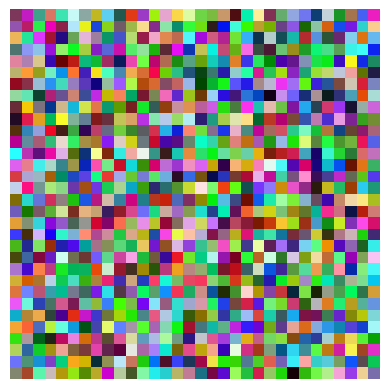

In [4]:
# def lfw_dataset(lfw_path, shape_img):
#     images_all = []
#     labels_all = []
#     folders = os.listdir(lfw_path)
#     for foldidx, fold in enumerate(folders):
#         files = os.listdir(os.path.join(lfw_path, fold))
#         for f in files:
#             if len(f) > 4 and f[-4:] == '.jpg':
#                 images_all.append(os.path.join(lfw_path, fold, f))
#                 labels_all.append(foldidx)

#     transform = transforms.Compose([transforms.Resize(size=shape_img)])
#     dst = Dataset_from_Image(images_all, np.asarray(labels_all, dtype=int), transform=transform)
#     return dst



ASR=0
whole_time=0
sSim=0
mSe=0
count=0

''' train DLG and iDLG '''
for idx_net in range(num_exp):
    net = LeNet(channel=channel, hideen=hidden, num_classes=num_classes)
    net.apply(weights_init)

    print('running %d|%d experiment'%(idx_net, num_exp))
    net = net.to(device)
    idx_shuffle = np.random.permutation(len(dst))
    #idx_no_shuffle = np.arange(len(dst))
    start=time.process_time()
    for method in ['iDLG']:#, 'DLG']:
        print('%s, Try to generate %d images' % (method, num_dummy))

        criterion = nn.CrossEntropyLoss().to(device)
        imidx_list = []

        for imidx in range(num_dummy):
            idx = idx_shuffle[imidx]
            imidx_list.append(idx)
            tmp_datum = tt(dst[idx][0]).float().to(device)
            tmp_datum = tmp_datum.view(1, *tmp_datum.size())
            tmp_label = torch.Tensor([dst[idx][1]]).long().to(device)
            tmp_label = tmp_label.view(1, )
            if imidx == 0:
                gt_data = tmp_datum
                gt_label = tmp_label
            else:
                gt_data = torch.cat((gt_data, tmp_datum), dim=0)
                gt_label = torch.cat((gt_label, tmp_label), dim=0)


        # compute original gradient
        out = net(gt_data)
        y = criterion(out, gt_label)
        dy_dx = torch.autograd.grad(y, net.parameters())
        original_dy_dx = list((_.detach().clone() for _ in dy_dx))

        # generate dummy data and label
        dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
        dummy_label = torch.randn((gt_data.shape[0], num_classes)).to(device).requires_grad_(True)

        if method == 'DLG':
            optimizer = torch.optim.LBFGS([dummy_data, dummy_label])
        elif method == 'iDLG':
            optimizer = torch.optim.LBFGS([dummy_data, ])
            # predict the ground-truth label
            label_pred = torch.argmin(torch.sum(original_dy_dx[-2], dim=-1), dim=-1).detach().reshape((1,)).requires_grad_(False)

        history = []
        history_iters = []
        losses = []
        mses = []
        mse_f = []
        SSIMS = []
        train_iters = []

        print('lr =', lr)
        for iters in range(Iteration):

            def closure():
                optimizer.zero_grad()
                pred = net(dummy_data)
                if method == 'DLG':
                    dummy_loss = - torch.mean(torch.sum(torch.softmax(dummy_label, -1) * torch.log(torch.softmax(pred, -1)), dim=-1))
                    # dummy_loss = criterion(pred, gt_label)
                elif method == 'iDLG':
                    dummy_loss = criterion(pred, label_pred)

                dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)

                grad_diff = 0
                for gx, gy in zip(dummy_dy_dx, original_dy_dx):
                    grad_diff += ((gx - gy) ** 2).sum()
                grad_diff.backward()
                return grad_diff

            optimizer.step(closure)
            current_loss = closure().item()
            train_iters.append(iters)
            losses.append(current_loss)
            mses.append(torch.mean((dummy_data-gt_data)**2).item())
            mse_f.append(F.mse_loss(dummy_data,torch.unsqueeze(gt_data,dim=0),  reduction='mean').item())
            SSIMS.append(ssim(dummy_data,gt_data,data_range=0).item())


            if iters % int(Iteration / 30) == 0:
                current_time = str(time.strftime("[%Y-%m-%d %H:%M:%S]", time.localtime()))
                print(current_time, iters, 'loss = %.8f, mse = %.8f, mse_with_function = %.8f, ssim = %.8f' %(current_loss, mses[-1], mse_f[-1], SSIMS[-1]))
                #print(current_time, iters, 'loss = %.8f, mse = %.8f, mse_with_function = %.8f' %(current_loss, mses[-1], mse_f[-1]))
                history.append([tp(dummy_data[imidx].cpu()) for imidx in range(num_dummy)])
                history_iters.append(iters)

                for imidx in range(num_dummy):
                    #plt.figure(figsize=(12, 8))
                    #plt.subplot(3, 10, 1)
                    plt.imshow(tp(gt_data[imidx].cpu()))
                    for i in range(min(len(history), 29)):
                        #plt.subplot(3, 10, i + 2)
                        plt.imshow(history[i][imidx])
                        #plt.title('iter=%d' % (history_iters[i]))
                        plt.axis('off')
                    if method == 'DLG':
                        plt.savefig('%s/DLG_on_%s_%05d.png' % (save_path, imidx_list, imidx_list[imidx]))
                        plt.close()
                    elif method == 'iDLG':
                        plt.savefig('%s/Lbl_%s_iDLG_on_%s_%05d.png' % (save_path, gt_label.item(), imidx_list, imidx_list[imidx]))
                        plt.close()

                if current_loss < 0.000001: # converge
                    break

        if method == 'DLG':
            loss_DLG = losses
            label_DLG = torch.argmax(dummy_label, dim=-1).detach().item()
            mse_DLG = mses
        elif method == 'iDLG':
            loss_iDLG = losses
            label_iDLG = label_pred.item()
            mse_iDLG = mses
            mse_f_iDLG = mse_f
            SSIM = SSIMS

    end=time.process_time()

    print('imidx_list:', imidx_list)
#         print('loss_DLG:', loss_DLG[-1], 'loss_iDLG:', loss_iDLG[-1])
#         print('mse_DLG:', mse_DLG[-1], 'mse_iDLG:', mse_iDLG[-1])
#         print('gt_label:', gt_label.detach().cpu().data.numpy(), 'lab_DLG:', label_DLG, 'lab_iDLG:', label_iDLG)


    print('loss_iDLG:', loss_iDLG[-1])
    print('mse_iDLG:', mse_iDLG[-1])
    print('mse_iDLG_with_functuon:', mse_f_iDLG[-1])
    mSe=mSe+mse_f_iDLG[-1]
    print('SSIM_iDLG:', SSIM[-1])
    sSim=sSim+SSIM[-1]
    duration=end-start
    print('Duration:',duration)
    whole_time=whole_time+duration
    print('gt_label:', gt_label.detach().cpu().data.numpy(), 'lab_iDLG:', label_iDLG)
    
    print('----------------------\n\n')

    if(SSIM[-1]>=.90):
        ASR=ASR+1
        #print(AS)
    count=count+1




In [5]:
print("Count:",count)
print("ASR:",ASR/count)
print("Avg. SSIM:",sSim/count)
print("Avg. MSE is:",mSe/count)
print("Avg. time:",whole_time/count)

Count: 88
ASR: 0.5454545454545454
Avg. SSIM: 0.5722424865996285
Avg. MSE is: 3.749121071340065e+16
Avg. time: 125.60014204545455
